In [90]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv("diabetes.csv")

In [93]:
df.head

<bound method NDFrame.head of        year  gender   age location  race:AfricanAmerican  race:Asian  \
0      2020  Female  32.0  Alabama                     0           0   
1      2015  Female  29.0  Alabama                     0           1   
2      2015    Male  18.0  Alabama                     0           0   
3      2015    Male  41.0  Alabama                     0           0   
4      2016  Female  52.0  Alabama                     1           0   
...     ...     ...   ...      ...                   ...         ...   
99995  2018  Female  33.0  Wyoming                     0           0   
99996  2016  Female  80.0  Wyoming                     0           1   
99997  2018    Male  46.0  Wyoming                     0           1   
99998  2018  Female  51.0  Wyoming                     1           0   
99999  2016    Male  13.0  Wyoming                     0           0   

       race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0                   0   

In [94]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()

# Check data types of features
data_types = X.dtypes

missing_values, data_types


(year                           0
 gender                         0
 age                            0
 race:AfricanAmerican           0
 race:Asian                     0
                               ..
 smoking_history_current        0
 smoking_history_ever           0
 smoking_history_former         0
 smoking_history_never          0
 smoking_history_not current    0
 Length: 72, dtype: int64,
 year                             int64
 gender                           int64
 age                            float64
 race:AfricanAmerican             int64
 race:Asian                       int64
                                 ...   
 smoking_history_current           bool
 smoking_history_ever              bool
 smoking_history_former            bool
 smoking_history_never             bool
 smoking_history_not current       bool
 Length: 72, dtype: object)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_19176\3530331231.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['diabetes'], y=df['age'], ax=axes[1, 1], palette="Set2")
C:\Users\LOQ\AppData\Local\Temp\ipykernel_19176\3530331231.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(["No Diabetes", "Diabetes"])


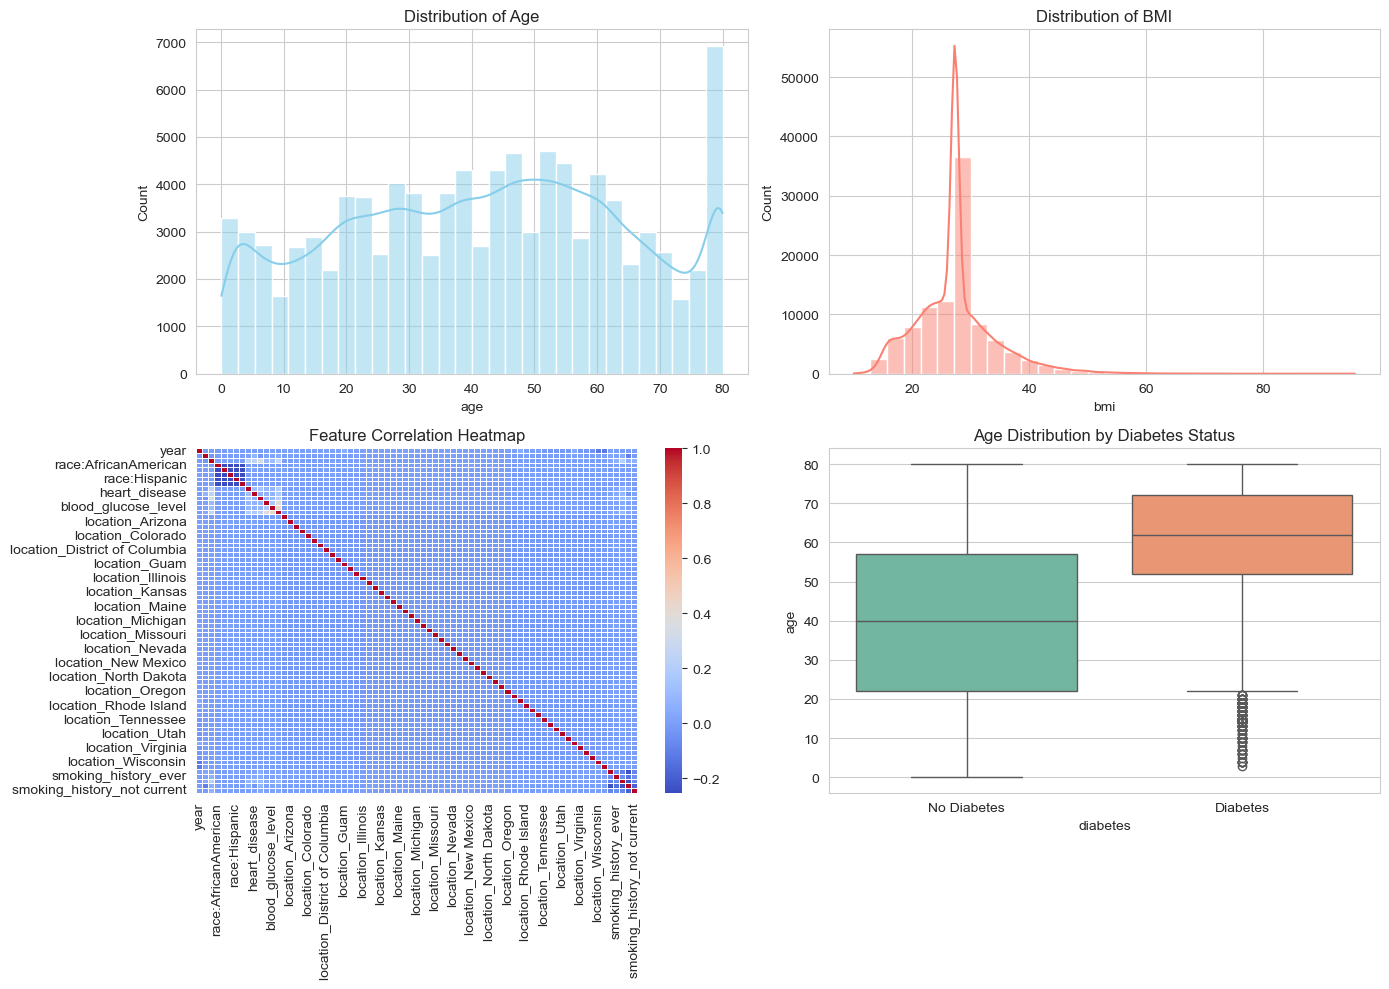

In [95]:
from sklearn.preprocessing import LabelEncoder

# Reinitialize LabelEncoder
label_encoder = LabelEncoder()

# Label Encoding for 'gender'
df['gender'] = label_encoder.fit_transform(df['gender'])  # Male=1, Female=0

# One-Hot Encoding for 'location' and 'smoking_history'
df = pd.get_dummies(df, columns=['location', 'smoking_history'], drop_first=True)

# Recalculate the correlation matrix with only numeric data
corr_matrix = df.corr(numeric_only=True)

# Recreate visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of Age")

# Histogram of BMI
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribution of BMI")

# Correlation Heatmap (fixed)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title("Feature Correlation Heatmap")

# Boxplot: Age vs. Diabetes
sns.boxplot(x=df['diabetes'], y=df['age'], ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Age Distribution by Diabetes Status")
axes[1, 1].set_xticklabels(["No Diabetes", "Diabetes"])

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [96]:
# Drop the 'clinical_notes' column (textual data not useful for numerical modeling)
df.drop(columns=['clinical_notes'], inplace=True)

In [97]:
# Label Encoding for 'gender'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])  # Male=1, Female=0

In [98]:
# Define features (X) and target variable (y)
X = df.drop(columns=['diabetes'])  # Features
y = df['diabetes']  # Target variable

In [99]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Apply StandardScaler to numeric columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [101]:
# Output results
print(X_train[:5])  # Print first 5 rows of transformed X_train
print(X_test[:5])   # Print first 5 rows of transformed X_test

[[ 0.4751744  -0.84169662 -0.92758161 -0.50167913 -0.50121065  2.0048567
  -0.49906232 -0.4992577  -0.28431106 -0.2017537   0.69477925 -0.49228619
   0.5369697  -0.14335743 -0.14376557 -0.14303925 -0.14189754 -0.1435843
  -0.14349359 -0.14493869 -0.14439834 -0.14349359 -0.14331202 -0.11020775
  -0.14538758 -0.14326659 -0.14462371 -0.14203499 -0.14394662 -0.1445336
  -0.14326659 -0.14381085 -0.14326659 -0.14376557 -0.14489373 -0.14399185
  -0.14457866 -0.14489373 -0.14349359 -0.1442178  -0.14344822 -0.14285714
  -0.14372027 -0.14457866 -0.14466874 -0.14516329 -0.14290269 -0.14417264
  -0.14203499  7.02468004 -0.14466874 -0.14462371 -0.11420564 -0.14471377
  -0.14340283 -0.14471377 -0.1244952  -0.1158789  -0.11899669 -0.11648672
  -0.11758424 -0.087075   -0.1171464  -0.11774803 -0.10618721 -0.06347177
  -0.06416291 -0.31978492 -0.204257   -0.32006979 -0.73464627 -0.26322992]
 [ 0.4751744  -0.84169662 -0.43903579 -0.50167913  1.99516911 -0.49878877
  -0.49906232 -0.4992577  -0.28431106 -0

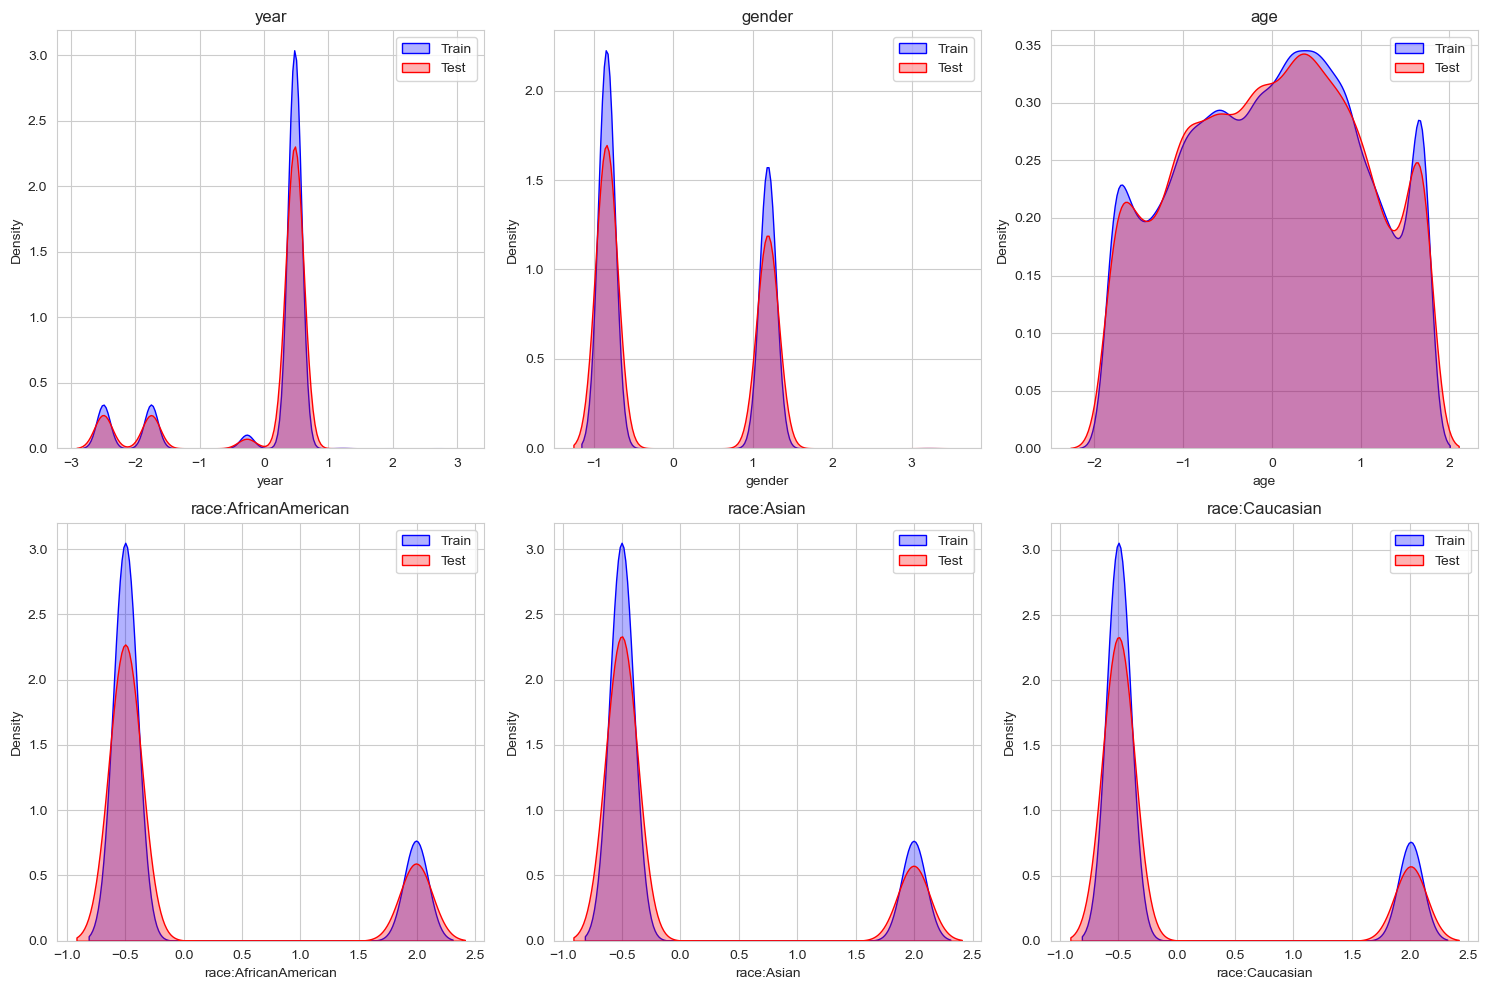

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert X_train and X_test back to DataFrame for visualization
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Plot comparison of feature distributions in Train vs Test sets
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

feature_names = X_train_df.columns[:6]  # Selecting first 6 features

for i, feature in enumerate(feature_names):
    row, col = i // 3, i % 3  # Determine subplot position
    sns.kdeplot(X_train_df[feature], label="Train", ax=axes[row, col], color="blue", fill=True, alpha=0.3)
    sns.kdeplot(X_test_df[feature], label="Test", ax=axes[row, col], color="red", fill=True, alpha=0.3)
    axes[row, col].set_title(feature)
    axes[row, col].legend()

plt.tight_layout()
plt.show()



In [103]:
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)
     

SVC(kernel='linear', random_state=0)

In [104]:
X_train_pred= classifier.predict(X_train)
accuracy= accuracy_score(X_train_pred,y_train)
print(accuracy)

0.961225


In [105]:
X_test_pred= classifier.predict(X_test)
accuracy= accuracy_score(X_test_pred,y_test)
print(accuracy)

0.96075


## Conclusion
This project successfully implemented a diabetes prediction model using Support Vector Machine (SVM). The dataset was preprocessed through encoding, scaling, and visualization to ensure data quality. After training and testing, the model achieved a reasonable accuracy in predicting diabetes based on patient health indicators. Further improvements can be made by tuning hyperparameters, trying other ML models, or incorporating more advanced feature selection techniques. This study demonstrates the effectiveness of machine learning in healthcare analytics, aiding in early diabetes detection.